In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler , Normalizer ,MinMaxScaler , normalize

from sklearn.model_selection import train_test_split , StratifiedKFold 

from sklearn.decomposition import PCA
import xgboost as xgb


In [2]:
feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                'BMI','PedigreeFn','Age','class']

In [3]:
df = pd.read_csv('../data/pima-indians-diabetes.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',
                5:'BMI',6:'PedigreeFn',7:'Age',8:'class'},inplace=True)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'PedigreeFn', 'Age', 'class'],
      dtype='object')

## Check Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
PedigreeFn       768 non-null float64
Age              768 non-null int64
class            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFn       0
Age              0
class            0
dtype: int64

In [8]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFn       0
Age              0
class            0
dtype: int64

# Count Zeros

In [9]:
df.isin([0]).sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
PedigreeFn         0
Age                0
class            500
dtype: int64

In [10]:
#handling missing data 

# df.glucose.replace(0,np.nan,inplace = True)
# df.insulin.replace(0,np.nan,inplace = True)
# df.blood_pressure.replace(0,np.nan,inplace = True)
# df.bmi.replace(0,np.nan,inplace = True)
# df.skin_thickness.replace(0,np.nan,inplace = True)
# df.age.replace(0,np.nan,inplace = True)
# df.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

## Exploratory

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


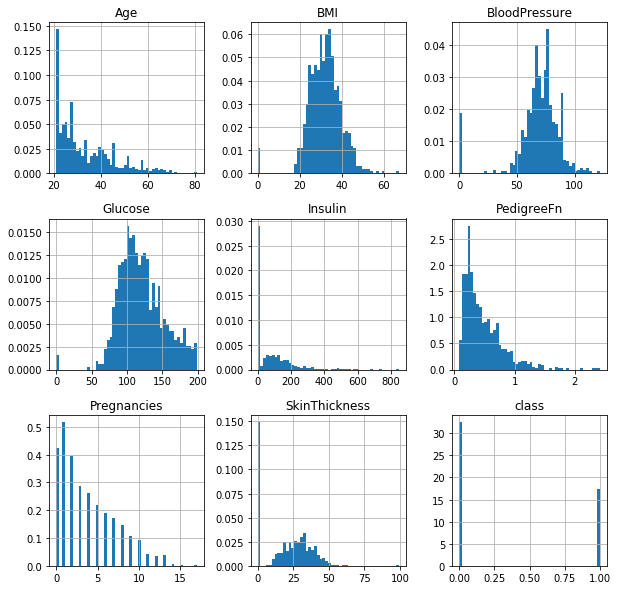

In [12]:
df.hist(density=True,bins=50 ,figsize = (10,10))
pass

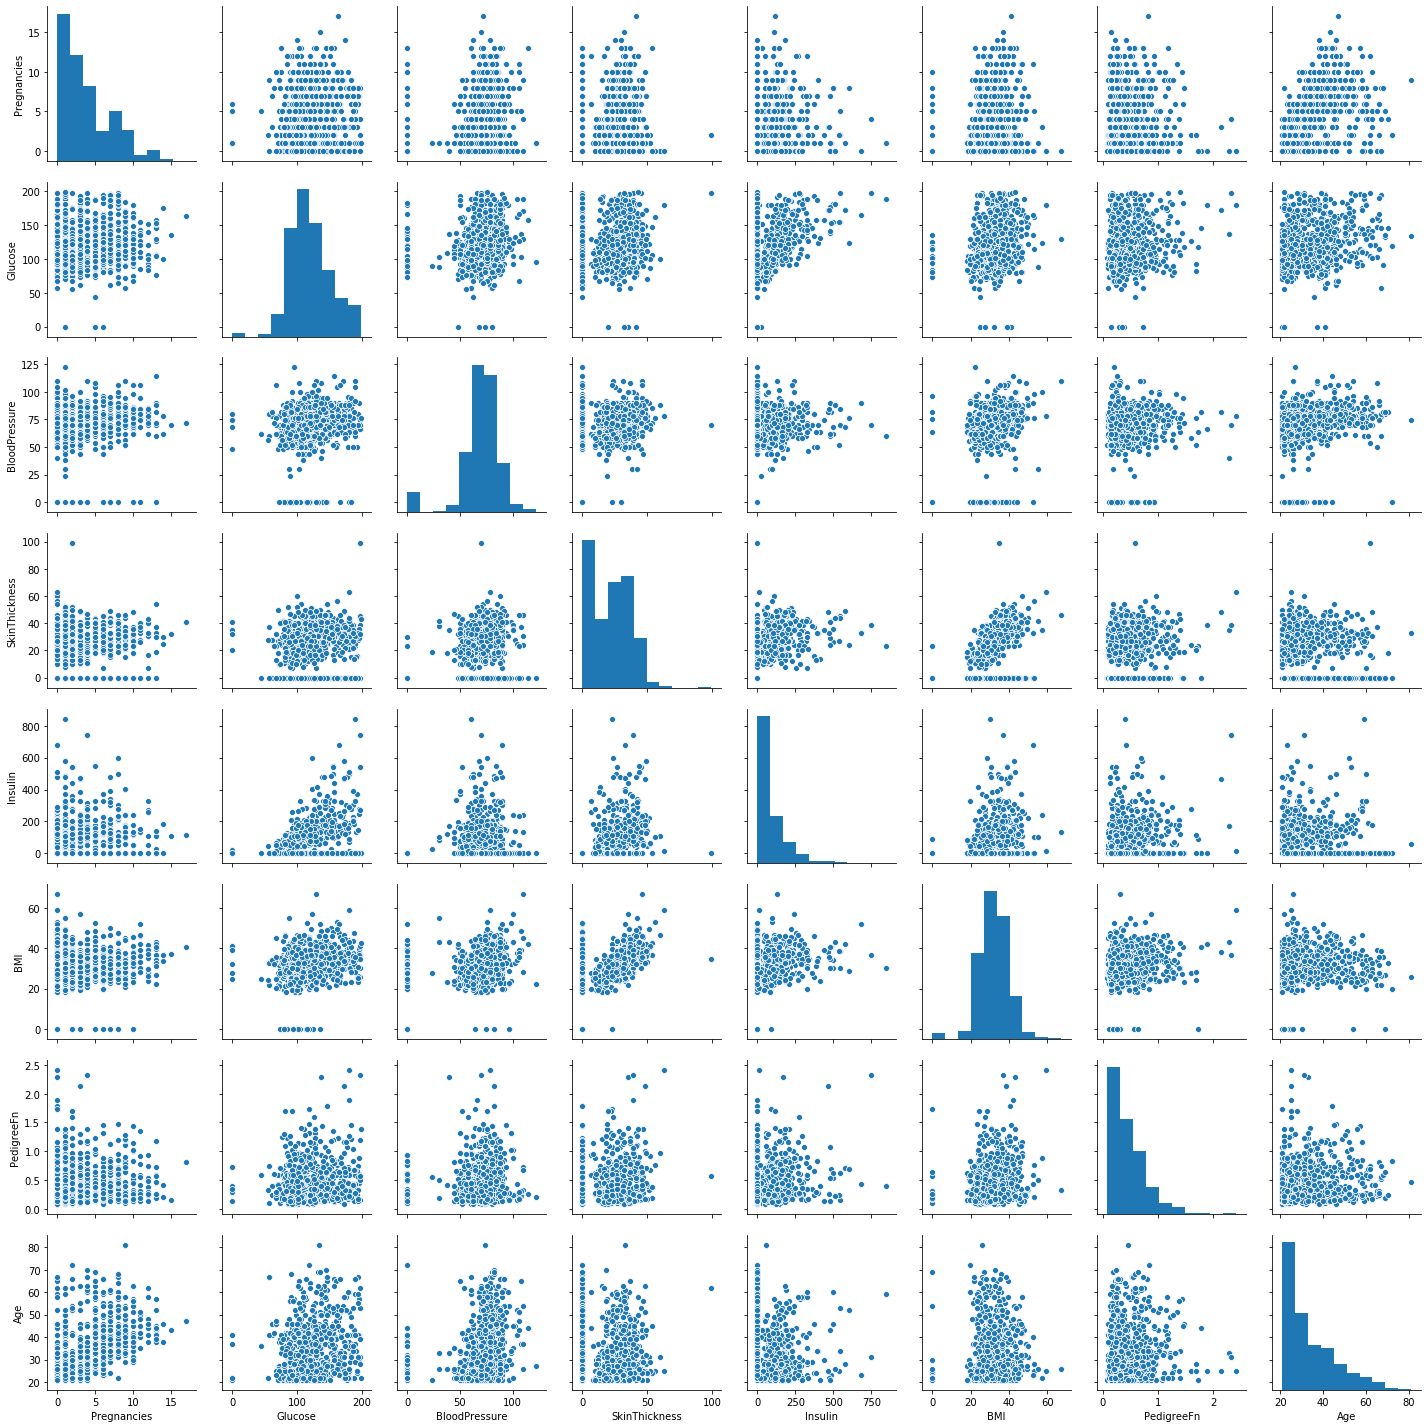

In [13]:
sns.pairplot(df ,vars=df.columns[:-1])
plt.show()

In [14]:
df.cov(min_periods=12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
PedigreeFn,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
class,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


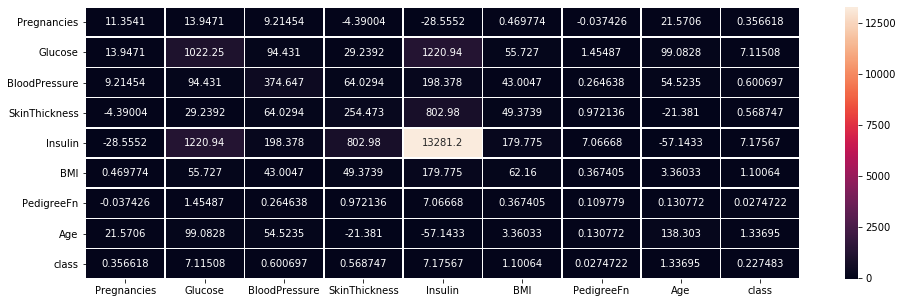

In [15]:
covMatrix = df.cov()
plt.figure(figsize = (16,5))
sns.heatmap(covMatrix, annot=True, fmt='g',linewidths=.5)

In [16]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
PedigreeFn,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
Pregnancies,1,0.129459,0.141282,-0.0816718,-0.0735346,0.0176831,-0.0335227,0.544341,0.221898
Glucose,0.129459,1,0.15259,0.0573279,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.15259,1,0.207371,0.0889334,0.281805,0.0412649,0.239528,0.0650684
SkinThickness,-0.0816718,0.0573279,0.207371,1,0.436783,0.392573,0.183928,-0.11397,0.0747522
Insulin,-0.0735346,0.331357,0.0889334,0.436783,1,0.197859,0.185071,-0.042163,0.130548
BMI,0.0176831,0.221071,0.281805,0.392573,0.197859,1,0.140647,0.0362419,0.292695
PedigreeFn,-0.0335227,0.137337,0.0412649,0.183928,0.185071,0.140647,1,0.0335613,0.173844
Age,0.544341,0.263514,0.239528,-0.11397,-0.042163,0.0362419,0.0335613,1,0.238356
class,0.221898,0.466581,0.0650684,0.0747522,0.130548,0.292695,0.173844,0.238356,1


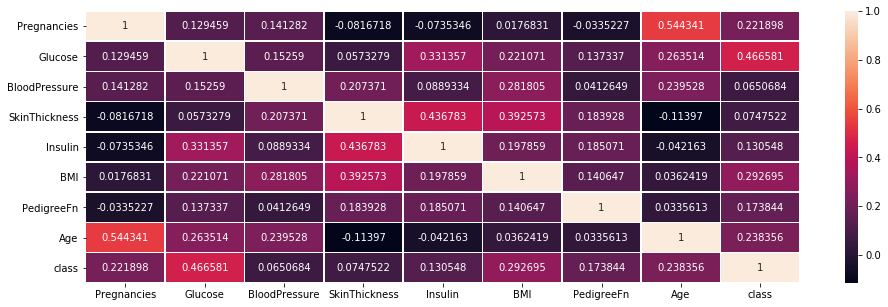

In [18]:
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True, fmt='g',linewidths=.5)

In [19]:
df_skinNa = df['SkinThickness'].replace(0, np.nan,inplace=True)

In [20]:
df['Insulin'].replace(0, np.nan,inplace=True)

In [21]:
df.isin([0]).sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness      0
Insulin            0
BMI               11
PedigreeFn         0
Age                0
class            500
dtype: int64

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)

df_filled = imputer.fit_transform(df)

In [23]:
type(df_filled)

numpy.ndarray

In [24]:
df_kimp = pd.DataFrame(df_filled)

In [25]:
df_kimp.isin([0]).sum()

0    111
1      5
2     35
3      0
4      0
5     11
6      0
7      0
8    500
dtype: int64

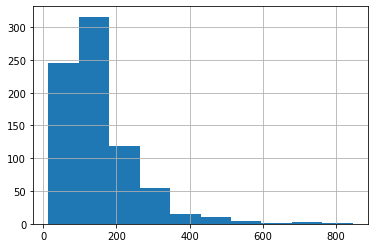

In [26]:
df_kimp[4].hist()

In [27]:
y = df_kimp.iloc[:,8]
X = df_kimp.iloc[:,:8]

X.shape , y.shape
# X.head(20)

((768, 8), (768,))

## Scaling Normalization

In [28]:
X.head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.00,179.50,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00,61.00,26.6,0.351,31.0
2,8.0,183.0,64.0,28.75,163.75,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33.0


In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled.shape

(768, 8)

In [31]:
## Testing if scaling changes correlation
npdf = pd.DataFrame(data=X_scaled)
npcorrdf = npdf.corr()
npcorrdf.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7
0,1,0.129459,0.141282,0.104558,0.0440333,0.0176831,-0.0335227,0.544341
1,0.129459,1,0.15259,0.225858,0.619133,0.221071,0.137337,0.263514
2,0.141282,0.15259,1,0.180013,0.130695,0.281805,0.0412649,0.239528
3,0.104558,0.225858,0.180013,1,0.240775,0.596866,0.117761,0.148989
4,0.0440333,0.619133,0.130695,0.240775,1,0.240285,0.140871,0.216986
5,0.0176831,0.221071,0.281805,0.596866,0.240285,1,0.140647,0.0362419
6,-0.0335227,0.137337,0.0412649,0.117761,0.140871,0.140647,1,0.0335613
7,0.544341,0.263514,0.239528,0.148989,0.216986,0.0362419,0.0335613,1


In [32]:
y = np.array(y)
type(y) , type(X_scaled)

(numpy.ndarray, numpy.ndarray)

## PCA NUmber of Components Selection

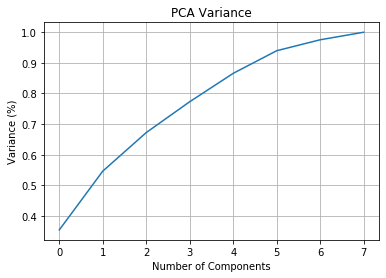

In [33]:
#Fitting the PCA algorithm with our Data
#Plotting the Cumulative Summation of the Explained Variance
pca = PCA().fit(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA Variance')
plt.grid()
plt.show()

## PCA

In [34]:
pca = PCA(n_components=5)
X_pca = pca.fit(X_scaled).transform(X_scaled)

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio : %s' % str(pca.explained_variance_ratio_))
X_pca.shape

explained variance ratio : [0.35450192 0.19199147 0.12589658 0.10076609 0.09262871]


(768, 5)

## Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


## XGB

In [36]:
model=xgb.XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.734375

# LDA

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

/home/hyper/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/hyper/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [38]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, stratify=y, random_state=42)
print (X_train_lda.shape, y_train_lda.shape)
print (X_test_lda.shape, y_test_lda.shape)

(576, 1) (576,)
(192, 1) (192,)


In [39]:
model_lda=xgb.XGBClassifier()
model_lda.fit(X_train_lda, y_train_lda)
model_lda.score(X_test_lda,y_test_lda)

0.7447916666666666

In [43]:
predicted_labels = model_lda.predict(X_test_lda)

## Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score ,roc_auc_score ,confusion_matrix ,roc_curve

In [44]:
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

[[107  18]
 [ 31  36]]


## Change order of Confusion Matrix
TP top Left corner TN Bottom Right Corner

In [45]:
cn_fix = confusion_matrix(y_test, predicted_labels, labels=[1, 0])
print(cn_fix)

[[ 36  31]
 [ 18 107]]


In [46]:
precision_score(y_test, predicted_labels)

0.6666666666666666

In [47]:
roc_auc_score(y_test, predicted_labels)

0.6966567164179104

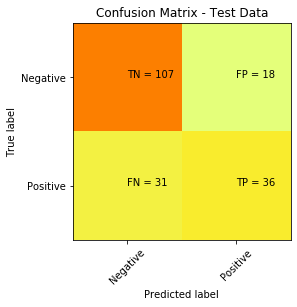

In [48]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [49]:
from sklearn.metrics import roc_curve ,auc

In [50]:
fpr, tpr, _ = roc_curve(y_test, predicted_labels)
roc_auc = auc(fpr, tpr)

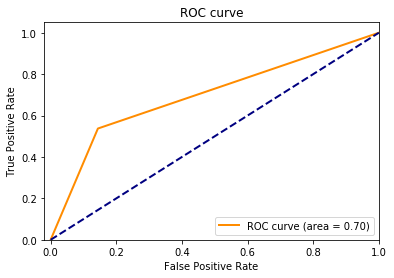

In [51]:
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()